In [2]:
from tensorflow.keras.applications import VGG19
import numpy as np
import matplotlib.pyplot as plt
from tensorflow .keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow .keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model 
import tensorflow as tf
from tensorflow.keras import layers, callbacks

In [4]:
base_model=VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))

I0000 00:00:1757697280.356558      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable=False

In [6]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predications=Dense(4,activation='softmax')(x)

In [7]:
model=Model(inputs=base_model.input,outputs=predications)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_dir = '/kaggle/input/eye-diseases-classification/dataset'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(224, 224),
    seed=42,
)

Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.


In [11]:
class_names=train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


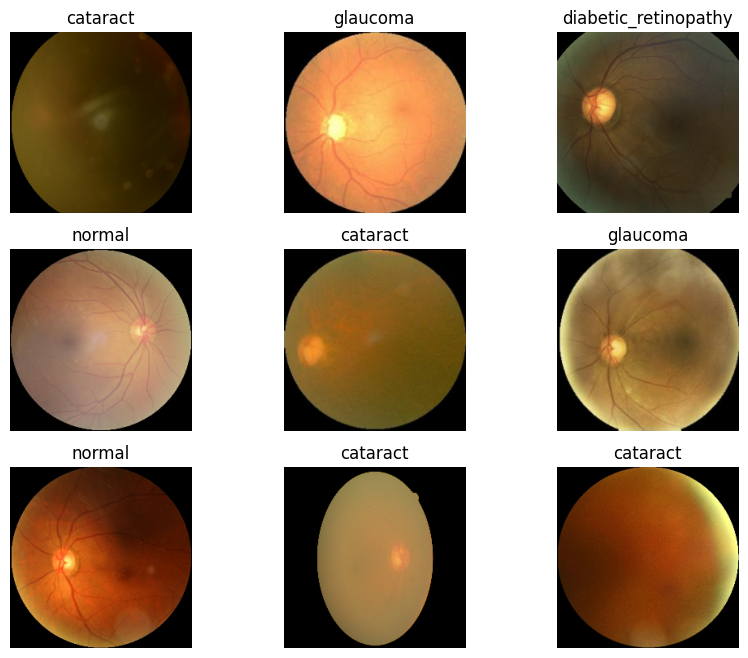

In [14]:
# visualize some images 
plt.figure(figsize=(10,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [15]:
 # for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.5)
])

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,553,796 (78.41 MB)

 Trainable params: 529,412 (2.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [18]:
# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(patience=3)

# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)

Epoch 1/10


I0000 00:00:1757697642.810772      90 service.cc:148] XLA service 0x7ddb4000f0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757697642.811488      90 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757697643.146159      90 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/106 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.2891 - loss: 3.5077  

I0000 00:00:1757697651.081229      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - accuracy: 0.6553 - loss: 1.7593 - val_accuracy: 0.7556 - val_loss: 0.6313
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8154 - loss: 0.5002 - val_accuracy: 0.8956 - val_loss: 0.2674
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8875 - loss: 0.2991 - val_accuracy: 0.9193 - val_loss: 0.2364
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9008 - loss: 0.2665 - val_accuracy: 0.9122 - val_loss: 0.2230
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9088 - loss: 0.2266 - val_accuracy: 0.8648 - val_loss: 0.3107
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.9168 - loss: 0.2166 - val_accuracy: 0.9407 - val_loss: 0.1811
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9385 - loss: 0.1639 - val_accuracy: 0.9573 - val_loss: 0.1525
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9301 - loss: 0.1807 - val

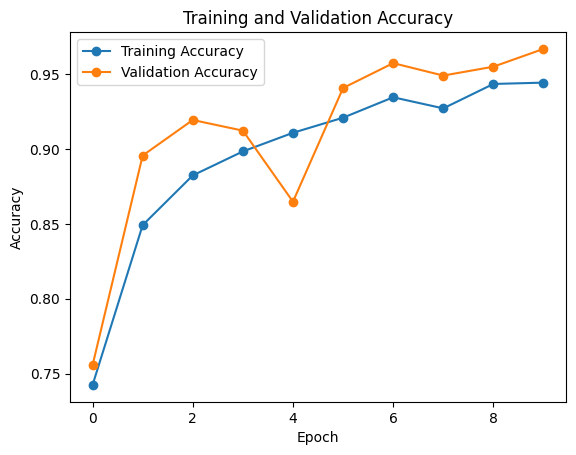

In [19]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

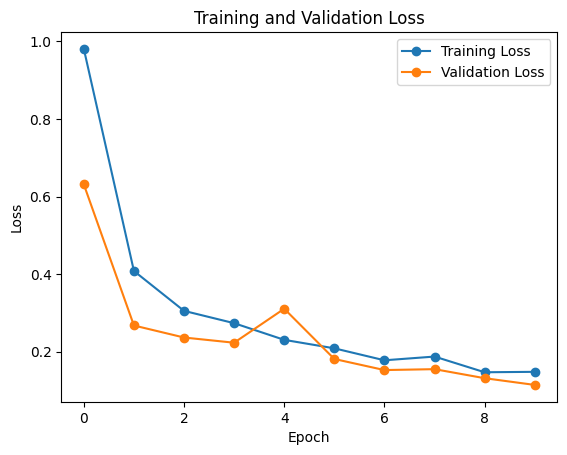

In [20]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [21]:
loss,accuracy=model.evaluate(val_ds)
print(f'Model loss :{loss:.3f}\nModel Accuracy:{accuracy*100:.3f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9697 - loss: 0.1007
Model loss :0.114
Model Accuracy:96.679


In [31]:
def predict_on_batch(image_batch):
    plt.figure(figsize=(10,10))
    for images,labels in image_batch:
        for i in range(9):
            single_img=images[i]
            img_arr=tf.expand_dims(single_img,axis=0)
            pred=model.predict(img_arr)
            idx=np.argmax(pred[0])
            # get the pred labels
            pred_label=class_names[idx]
            plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(f'Predicted:{pred_label}\nActual:{class_names[labels[i]]}')
            plt.axis('off')
            

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


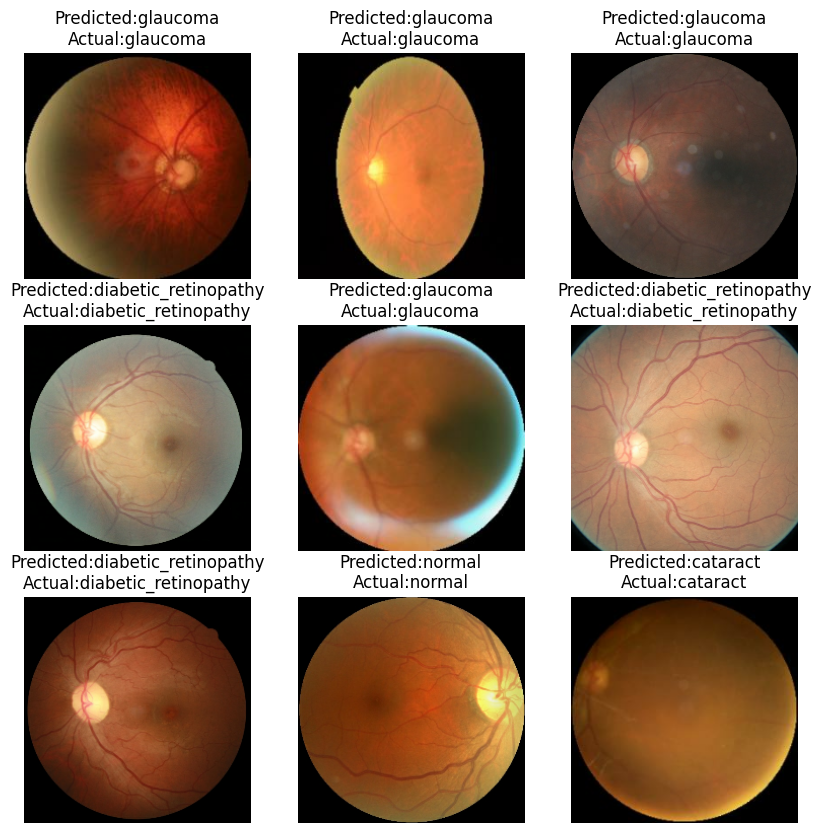

In [32]:
predict_on_batch(val_ds.take(1))

In [35]:
def predict_singleImage(img_path):
    img=tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224,3))
    # now create the arry
    img_arr=tf.keras.preprocessing.image.img_to_array(img)
    # expand dims
    img_arr=tf.expand_dims(img_arr,axis=0)
    # now do predictions  
    pred=model.predict(img_arr)
    # get the class 
    idx=np.argmax(pred[0])
    pred_clas=class_names[idx]
    plt.imshow(img)
    plt.title(f'Predicted :{pred_clas}')
    plt.axis('off')
    plt.tight_layout()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


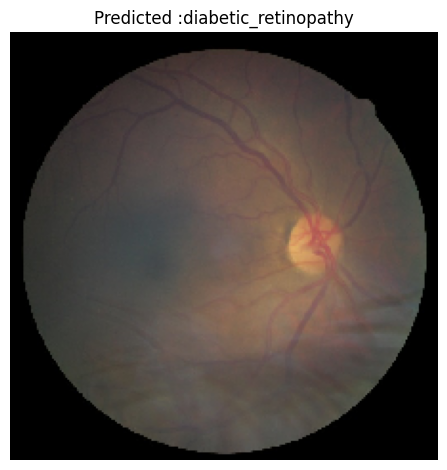

In [45]:
# Example usage
img_path = '/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10035_right.jpeg'

predict_singleImage(img_path)

In [46]:
model.save('eye_disease_model_VGG19.h5')